In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [3]:
train_data.tail()

,qid,question_text,target
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0
1306121,ffffed09fedb5088744a,Who wins in a battle between a Wolverine and a...,0


In [4]:
test_data.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [5]:
#To implement a bag of word classification, change data format to be useable with a classifier
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer

In [6]:
#Remove punctuation, stop words, convert text to lower case and stem words or lemmatize
#create stemmer
stemmer=PorterStemmer()

def stem_tokens(tokens,stemmer):
    stemmed=[stemmer.stem(items) for items in tokens ]
    return (stemmed)


In [7]:
#Now we have our tokenizer which remove non letters and stems words.

def tokenize(text):
    text=re.sub("[^a-zA-Z]"," ",text)
    tokens=nltk.word_tokenize(text)
    stems=stem_tokens(tokens,stemmer)
    return (stems)

In [8]:
vectorizer=CountVectorizer(
          analyzer='word',
          tokenizer=tokenize,
          lowercase=True,
          stop_words='english',
          max_features=85)


In [9]:
#Next, use the fit_transform() method to transform data into vector
#Concatenate all of training and test data since the input needed is a list of strings

features=vectorizer.fit_transform(train_data.question_text.tolist() + test_data.question_text.tolist() )

c:\program files\python37\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'sto

In [10]:
#Convert this feature into nd_array for easy use

In [11]:
features_nd=features.toarray()

In [12]:
#Now will use classifier to classify labels
#First will split Training and Test data to easier classify
from sklearn.model_selection import train_test_split

X_train,X_test, Y_train,Y_test = train_test_split(features_nd[0:len(train_data)],
                                 train_data.target,
                                 train_size=0.85,
                                 random_state=1234)

In [13]:
#Now ready to train our classifier 
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()


In [14]:
log_model=model.fit(X_train,Y_train)

In [15]:
#Now will predict class label for test data
y_prediction=log_model.predict(X_test)

y_prediction

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [16]:
#Now will find accuracy of our model
from sklearn.metrics import f1_score, accuracy_score,classification_report
from sklearn.naive_bayes import GaussianNB
#print(classification_report(y_prediction,Y_test))

def get_f1(fitted_clf, model):
  Y_pred = fitted_clf.predict(X_test)
  print(classification_report(Y_test, Y_pred), '\n')

  print(f'F1 score = {f1_score(Y_test, Y_pred): .2f}')

get_f1(model, 'LogisticRegression')

model = GaussianNB()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print("Accuracy: ", accuracy_score(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    183893
           1       0.57      0.13      0.21     12026

    accuracy                           0.94    195919
   macro avg       0.76      0.56      0.59    195919
weighted avg       0.92      0.94      0.92    195919
 

F1 score =  0.21
Accuracy:  0.7803428968093957


In [17]:
#Finally, re train model with all the training data and use it
#for sentiment classification with the original unlabeled test set.
model1=LogisticRegression()
log1_model=model1.fit(features_nd[0:len(train_data)],train_data.target)
test_prediction=log_model.predict(features_nd[len(train_data):])

test_prediction

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
test_data['Prediction']=test_prediction

In [19]:
#test_data.tail(5)

,qid,question_text,Prediction
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...,0
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...,0
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...,0
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?,0
375805,fffff85473f4699474b0,Climate change is a worrying topic. How much t...,0


In [20]:
#test_data.loc[345678]

qid                                           eb92af2ed35264b2a74a
question_text    What do you think the coolest mixed dog breeds...
Prediction                                                       0
Name: 345678, dtype: object

In [21]:
# import random
# spl = random.sample(range(len(test_prediction)), 5)
# for text, sentiment in zip(test_data.question_text[spl], test_prediction[spl]):
#     print(sentiment, text)

0 Will the Cursed Child be a movie?
0 What should a 10 year old girl at 5 ft weigh?
0 What is the process for changing currency in RBI?
0 How common are entrepreneurs staying up late at night?
0 Why did Martin Van Buren like Andrew Jackson?


In [22]:
Negative_reviews=test_data[test_data['Prediction']==1]

In [23]:
Positive_reviews=test_data[test_data['Prediction']==0]

In [24]:
print('Total Question to classify: '+ str(len(test_data)))
print("Sincere Questions: " + str(len(Positive_reviews)))
print("Insincere Questions: "+ str(len(Negative_reviews)))

Total Question to classify: 375806
Sincere Questions: 370727
Insincere Questions: 5079


In [25]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

per_positive=len(Positive_reviews)*100/len(test_data['Prediction'])
per_negative=len(Negative_reviews)*100/len(test_data['Prediction'])

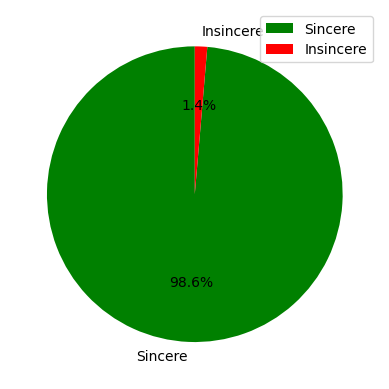

In [26]:
percentage=[per_positive,per_negative]
activities=['Sincere','Insincere']
colors=['g','r']
plt.pie(percentage,labels=activities,colors=colors,startangle=90,autopct='%.1f%%',shadow=False)
plt.legend(activities,loc='best')
plt.show()

In [27]:
test_data.to_csv('submission.csv',index=False)